In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os


In [2]:
mp = {
    "baboon_q=high": 83,
    "baboon_q=low": 12,
    "lena_q=high": 94,
    "lena_q=low": 34,
    "peppers_q=high": 93,
    "peppers_q=low": 30,
}

In [3]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

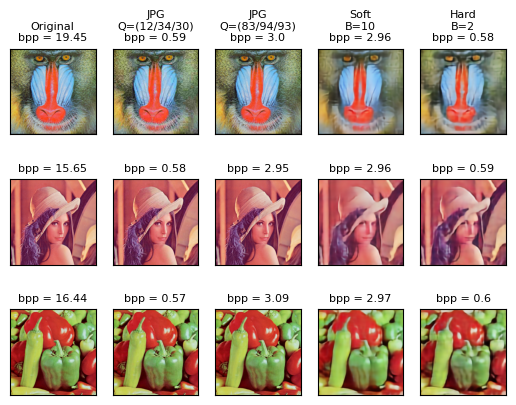

In [21]:
f, axarr = plt.subplots(3, 5)

psnr_jpg_soft = []
psnr_jpg_hard = []
psnr_soft = []
psnr_hard = []
bpp_original = []
bpp_jpg_hard = []
bpp_jpg_soft = []
bpp_soft = []
bpp_hard = []
IMAGE_SIZE = 512 * 512
ini_colnames = ['Original', "JPG\nQ=(12/34/30)", "JPG\nQ=(83/94/93)", "Soft\nB=10", "Hard\nB=2"]
for i, name in enumerate(['baboon', 'lena', 'peppers']):
    original = Image.open(f'../resources/test_images/{name}.png')
    jpg_encoded_q20 = Image.open(f'../resources/jpegs/{name}_q=low.jpg')
    jpg_encoded_q80 = Image.open(f'../resources/jpegs/{name}_q=high.jpg') # lena q90 |
    ae_soft_decoded = Image.open(f'../resources/results/B=10/{name}_reconstructed.png')
    ae_hard_decoded = Image.open(f'../resources/results/B=2/{name}_reconstructed.png')

    axarr[i, 0].imshow(original)
    axarr[i, 1].imshow(jpg_encoded_q20)
    axarr[i, 2].imshow(jpg_encoded_q80)
    axarr[i, 3].imshow(ae_soft_decoded)
    axarr[i, 4].imshow(ae_hard_decoded)

    bpp_original.append((os.path.getsize(f'../resources/test_images/{name}.png') * 8) / IMAGE_SIZE)
    bpp_jpg_soft.append((os.path.getsize(f'../resources/jpegs/{name}_q=high.jpg') * 8) / IMAGE_SIZE)
    bpp_jpg_hard.append((os.path.getsize(f'../resources/jpegs/{name}_q=low.jpg') * 8) / IMAGE_SIZE)
    bpp_soft.append((os.path.getsize(f'../resources/encoded/B=10/{name}.encoded') * 8)  / IMAGE_SIZE)
    bpp_hard.append((os.path.getsize(f'../resources/encoded/B=2/{name}.encoded') * 8)  / IMAGE_SIZE)

    psnr_jpg_soft.append(psnr(np.asarray(original), np.asarray(jpg_encoded_q80)))
    psnr_jpg_hard.append(psnr(np.asarray(original), np.asarray(jpg_encoded_q20)))
    psnr_soft.append(psnr(np.asarray(original), np.asarray(ae_soft_decoded)))
    psnr_hard.append(psnr(np.asarray(original), np.asarray(ae_hard_decoded)))

    for j, x in enumerate([bpp_original, bpp_jpg_hard, bpp_jpg_soft, bpp_soft, bpp_hard]):
        if i == 0:
            axarr[i, j].set_title(ini_colnames[j] + f"\nbpp = {round(x[-1], 2)}", size=8)
        else:
            axarr[i, j].set_title(f"\nbpp = {round(x[-1], 2)}", size=8)
plt.setp(axarr, xticks=[], yticks=[])
plt.savefig('../resources/analytics/images_comparison.png')

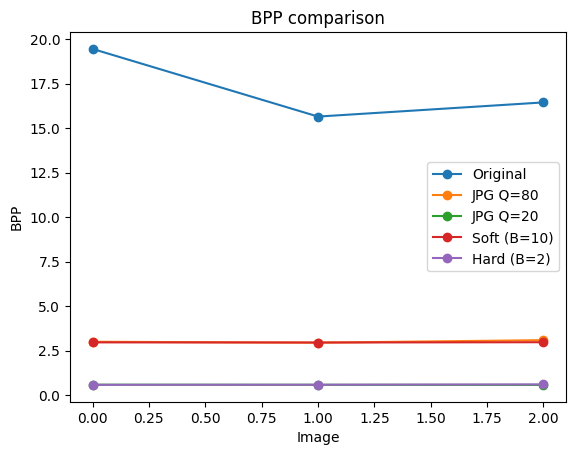

In [87]:

plt.plot(bpp_original, '-o', label='Original')
plt.plot(bpp_jpg_soft, '-o', label='JPG Q=80')
plt.plot(bpp_jpg_hard, '-o', label='JPG Q=20')
plt.plot(bpp_soft, '-o', label='Soft (B=10)')
plt.plot(bpp_hard, '-o', label='Hard (B=2)')
plt.xlabel('Image')
plt.ylabel('BPP')
plt.title('BPP comparison')
plt.legend()
plt.savefig('../resources/analytics/BPP.png')

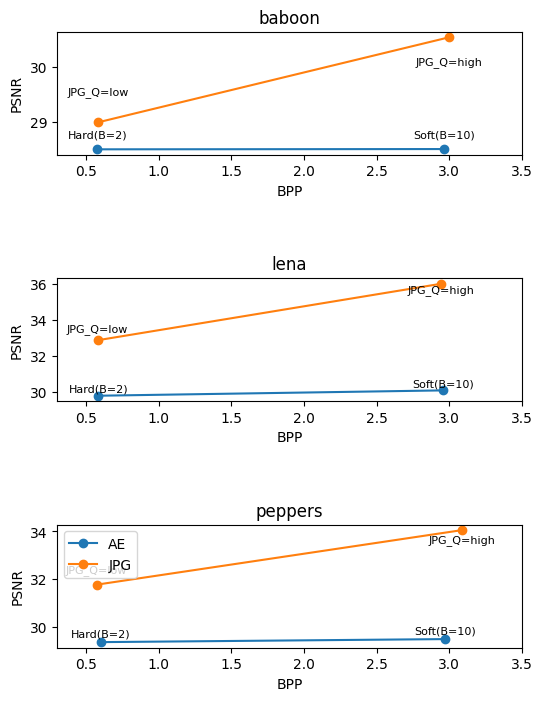

In [57]:
f, axarr = plt.subplots(3, 1, figsize=(6, 8))
for i, image in enumerate(['baboon', 'lena','peppers']):
    axarr[i].set_title(image)

    ae_bpp = [bpp_hard[i], bpp_soft[i]]
    ae_psnr = [psnr_hard[i], psnr_soft[i]]
    jpg_bpp = [bpp_jpg_hard[i], bpp_jpg_soft[i]]
    jpg_psnr = [psnr_jpg_hard[i], psnr_jpg_soft[i]]
    axarr[i].plot(ae_bpp, ae_psnr, '-o', label=f'AE')
    axarr[i].plot(jpg_bpp, jpg_psnr, '-o', label='JPG')

    axarr[i].text(ae_bpp[0], ae_psnr[0] + 0.2, f'Hard(B=2)', ha='center', size=8)
    axarr[i].text(ae_bpp[1], ae_psnr[1] + 0.2, f'Soft(B=10)', ha='center', size=8)
    axarr[i].text(jpg_bpp[0], jpg_psnr[0] + 0.5, f'JPG_Q=low', ha='center', size=8)
    axarr[i].text(jpg_bpp[1], jpg_psnr[1] - 0.5, f'JPG_Q=high', ha='center', size=8)
    axarr[i].set_xlim(0.3, 3.5)

    axarr[i].set_xlabel('BPP')
    axarr[i].set_ylabel('PSNR')
plt.subplots_adjust(hspace=1.0)
plt.legend()
plt.savefig('../resources/analytics/PSNR_BPP.png')

In [51]:
import cv2

for name in ['baboon', 'lena', 'peppers']:
    image = cv2.imread(f'../resources/test_images/{name}.png')

    cv2.imwrite(f'../resources/jpegs/{name}_q=high.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), int(mp[f'{name}_q=high'])])
    cv2.imwrite(f'../resources/jpegs/{name}_q=low.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), int(mp[f'{name}_q=low'])])